## Nondeterministic

‘is_slippery’ : True 강화학습을 해야하는 환경은 slippery 한 환경이 많다. 

slippery를 True로 주게되면 action이 한칸씩 안일어나기도 하고, 한칸만 가야할 것이 두 칸가기도하고 오른쪽으로 가야할 것이 왼쪽으로 가기도한다 → 정확도가 매우 떨어지게됨



solution?

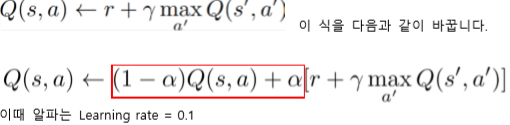

In [10]:
Image ("C:/Users/user/Pictures/nondeterministic.png") 


이 때 알파는 Q를 얼마나 믿을 것인지 %, (learning rate)

Q를 100% 믿지않는다. 내가 알고있는 것의 일부분과 Q의 일부를 조합하여 갱신

Success rate: 0.47
Final Q-Table Values
LEFT DOWN RIGHT UP
[[3.09615996e-02 4.71775945e-01 1.01889269e-02 2.41218211e-02]
 [2.22187886e-05 1.41754361e-03 4.28445671e-03 3.17355722e-01]
 [4.21234674e-03 6.56308826e-03 9.76316956e-04 2.22759574e-01]
 [1.56521744e-04 0.00000000e+00 6.51472492e-03 1.87493036e-01]
 [4.68465154e-01 5.44017635e-03 2.09079766e-04 1.35842982e-03]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [1.45716650e-05 1.16732164e-04 2.03617625e-01 3.22227958e-06]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [7.02093547e-04 1.76229437e-05 8.13354078e-04 5.25044605e-01]
 [0.00000000e+00 7.94818731e-01 1.78891867e-03 2.53064003e-03]
 [9.36786250e-01 4.91793235e-04 6.03872715e-04 1.14517509e-04]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 0.00000000e+00 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 6.76421791e-01 0.00000000e+00]
 [0.00000000e+00 0.00000000e+00 9.94109269e-01 0.00000000e+

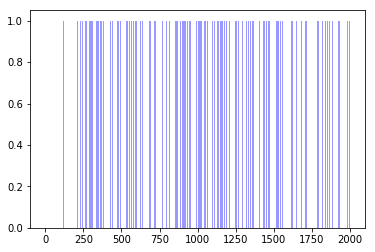

In [5]:
import gym
import numpy as np
import matplotlib.pyplot as plt

env = gym.make('FrozenLake-v0')

# Initialize table with all zeros
Q = np.zeros([env.observation_space.n, env.action_space.n])

# Set learning parameters
learning_rate = .85
dis = .99
num_episodes = 2000

# create lists to contain total rewards and steps per episode
rList = []
for i in range(num_episodes):
    # Reset environment and get first new observation
    state = env.reset()
    rAll = 0
    done = False

    # The Q-Table learning algorithm
    while not done:
        action = np.argmax(Q[state, :] + np.random.randn(1, env.action_space.n) / (i + 1))

        # Get new state and reward from environment
        new_state, reward, done, _ = env.step(action)

        # Update Q-Table with new knowledge using learning rate
        Q[state, action] = (1-learning_rate)*Q[state, action] + learning_rate* (reward + dis * np.max(Q[new_state, :]))
        
        
        state = new_state

        rAll += reward

    rList.append(rAll)

    
print("Success rate: " + str(sum(rList) / num_episodes))
print("Final Q-Table Values")
print("LEFT DOWN RIGHT UP")
print(Q)
plt.bar(range(len(rList)), rList, color='b', alpha=0.4)
plt.show()